#
Прочитайте данные из файла.
Определите оптимальное количество кластеров для прочитанных данных.
Постройте оптимальное разбиение на кластеры.
Спрогнозируйте классы для векторов
[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998]
и
[0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]

Постройте график метрики "силуэт" в зависимости от количества кластеров.

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score

In [80]:
data = pd.read_csv('X.csv')

In [81]:
data = pd.read_csv("X.csv", sep=" ", header=None)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       300 non-null    float64
 1   1       300 non-null    float64
 2   2       300 non-null    float64
 3   3       300 non-null    float64
 4   4       300 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [83]:
data.head(3)


,0,1,2,3,4
0,0.149014,0.097225,-0.424611,0.075148,0.107336
1,-0.041479,-0.115525,-0.126194,0.103934,0.168235
2,0.194307,-0.203077,-0.102814,-0.204007,0.324915


In [84]:
v1 = np.array([-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998])
v2 = np.array([0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884])


In [85]:
v1 = v1.reshape(1,-1)
v2 = v2.reshape(1,-1)

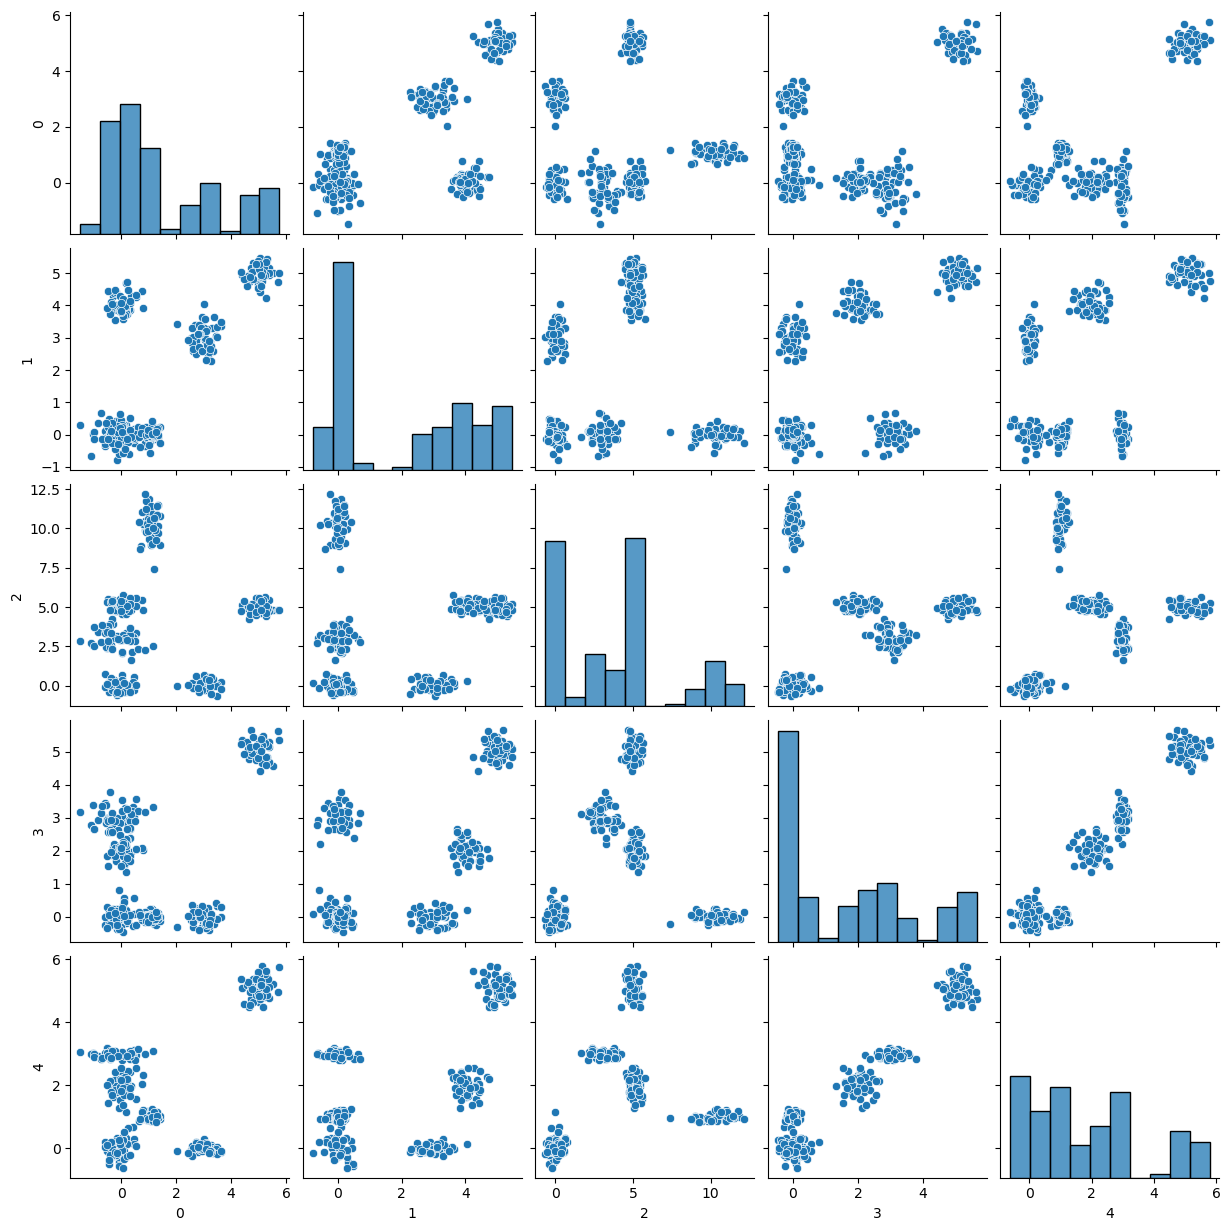

In [86]:
sns.pairplot(data);

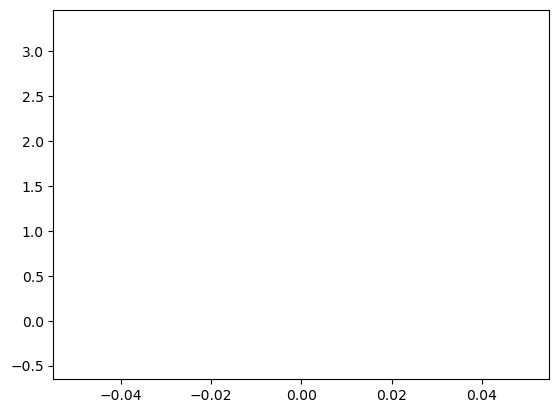

In [87]:
plt.plot(v1);
plt.plot(v2);

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


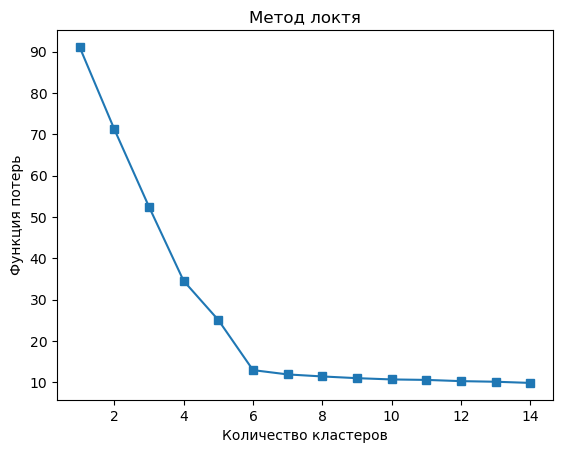

In [88]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data)
    inertia.append(np.sqrt(kmeans.inertia_))


plt.plot(range(1, 15), inertia, marker='s');
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Функция потерь');

In [89]:
km = KMeans(n_clusters=6, random_state = 1).fit(data)
#km.fit(data)


In [90]:
km.predict(v2)
# Судя по результату, вектор v2 принадлежит к первому классу 

array([1])

In [91]:
km.predict(v1)
# Судя по результату ветктор v1 принадлежит к нулевому классу 

array([0])

Text(0.5, 1.0, 'Дерево иерархий')

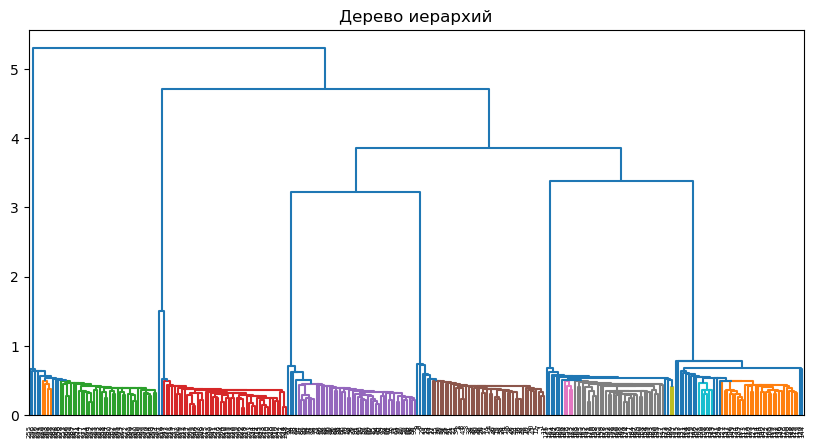

In [92]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(data) 

Z = hierarchy.linkage(distance_mat, 'single') 
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)
plt.title('Дерево иерархий')

In [93]:
from sklearn.cluster import AgglomerativeClustering

In [94]:
agg = AgglomerativeClustering(n_clusters = 6)

In [98]:
agg.fit_predict(data)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [102]:
from sklearn import metrics
metr_sil = metrics.silhouette_score(data, agg.labels_)
metr_sil

0.8122759257111298

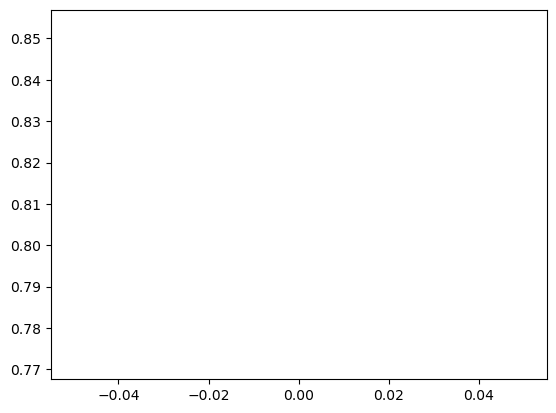

In [103]:
plt.plot(metr_sil)